## Gempy to pyGIMLi - 3D 
### Example from transform2021 Hackathon 

The purpose of this notebook is to show the conversion between Gempy - pyGIMLi using subsurface objects. These new functions are in the pyGIMLi library under meshtools. This example has helped to extend pyGIMLi 3D functionality. Right now `mt.fromSubsurface` supports unstructured and structured grids. This examples goes through different gempy models converted to pyGIMLi meshes 

**Note** : Create and activate environment for this notebook "absub"

Import all packages that are needed 

In [7]:
import shutil
import pandas as pd
import numpy as np
import subsurface as ss
import pooch
import gempy as gp
import xarray 
import matplotlib.pyplot as plt
import subsurface.reader.read_netcdf
import pygimli as pg
import pygimli.meshtools as mt

### Load Gempy Model 

Loading the gempy model that was built from well data (see [Tutorial welly and subsurface](https://softwareunderground.github.io/subsurface/examples/tutorials/reading_well_data.html#sphx-glr-examples-tutorials-reading-well-data-py) )

In [ ]:
model_files_2 = pooch.retrieve(
    url="https://github.com/cgre-aachen/gempy_data/raw/master/data/gempy_models/Kim.zip",
    known_hash="f530a88351ed0e38673c6937161c59a2f69df92202e14c1e5d5729ed5d72a323",
    processor=pooch.Unzip()
)

### Structured Grids 

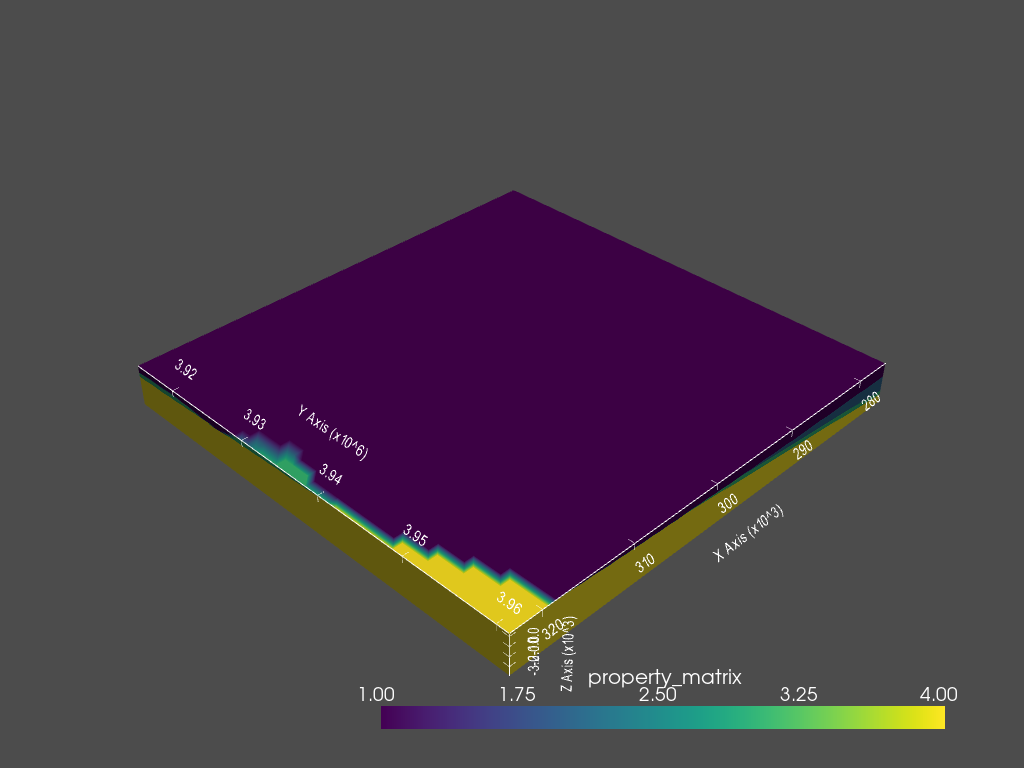

In [16]:
fname, = [i for i in model_files_2 if "regular_grid.nc" in i]
gempy_struct = ss.reader.read_netcdf.read_struct(fname)
regular_grid = ss.StructuredGrid(gempy_struct)

pyvista_mesh = ss.visualization.to_pyvista_grid(regular_grid,
                                                data_set_name='property_matrix',
                                                attribute_slice={'Properties': 'id'}
                                                )

ss.visualization.pv_plot([pyvista_mesh])

### pyGIMLi to subsurface 

In [27]:
pgmesh = mt.fromSubsurface(gempy_struct, order='F') #pass in structured subsurface object and `np.flatten` order ( C or F )

Now we go to pyGIMLi world ! 

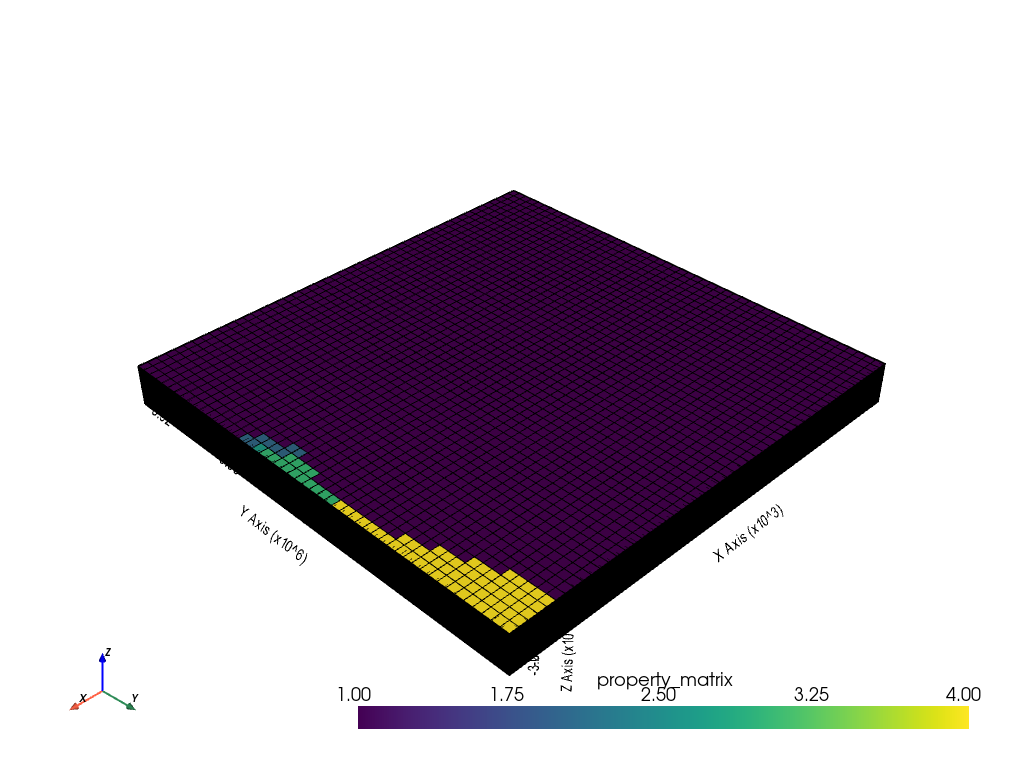

(<pyvista.plotting.plotting.Plotter at 0x7feb3960a9a0>, None)

In [23]:
pg.show(pgmesh, pgmesh['property_matrix'], label = 'property_matrix')

In [26]:
print(pgmesh)

Mesh: Nodes: 132651 Cells: 125000 Boundaries: 382500
Mesh contains data: block_matrix[0,...,2), fault_mask[0,...,2), mask_matrix[0,...,2), property_matrix, scalar_field_matrix[0,...,2)


### Unstructured Grids 

In the case of unstructured objects, we read in a mesh and use `ss.TriSurf` to grid the subsurface object. 
Here we read in a surface and convert it to pyGIMLi mesh 


In [29]:
data = ss.reader.read_netcdf.read_unstruct(data_path + '/meshes.nc')
ssGmpy = ss.TriSurf(data)
pg.info(ssGmpy.mesh)

pgmeshu = mt.fromSubsurface(ssGmpy, order='F')

/opt/anaconda3/envs/absub/lib/python3.8/site-packages/subsurface/reader/read_netcdf.py:15: UserWarning: Trying loading legacy files.
  warnings.warn("Trying loading legacy files.")
23/04/21 - 12:44:04 - pyGIMLi - INFO - <xarray.Dataset>
Dimensions:           (XYZ: 3, attribute: 1, cell: 17079, cell_attr: 1, nodes: 3, points: 8742, points_attribute: 0, vertex_attr: 0)
Coordinates:
  * points            (points) int64 0 1 2 3 4 5 ... 8737 8738 8739 8740 8741
  * XYZ               (XYZ) object 'X' 'Y' 'Z'
    cell_             (cell) int64 0 1 2 3 4 5 ... 17074 17075 17076 17077 17078
  * cell_attr         (cell_attr) object 'id'
  * vertex_attr       (vertex_attr) int64 
  * attribute         (attribute) object 'id'
  * points_attribute  (points_attribute) int64 
Dimensions without coordinates: cell, nodes
Data variables:
    vertex            (points, XYZ) float64 3.232e+07 5.691e+06 ... 1.945e+03
    cells             (cell, nodes) int32 2 1 0 1 2 ... 8738 8624 8624 8738 8740
    cell_

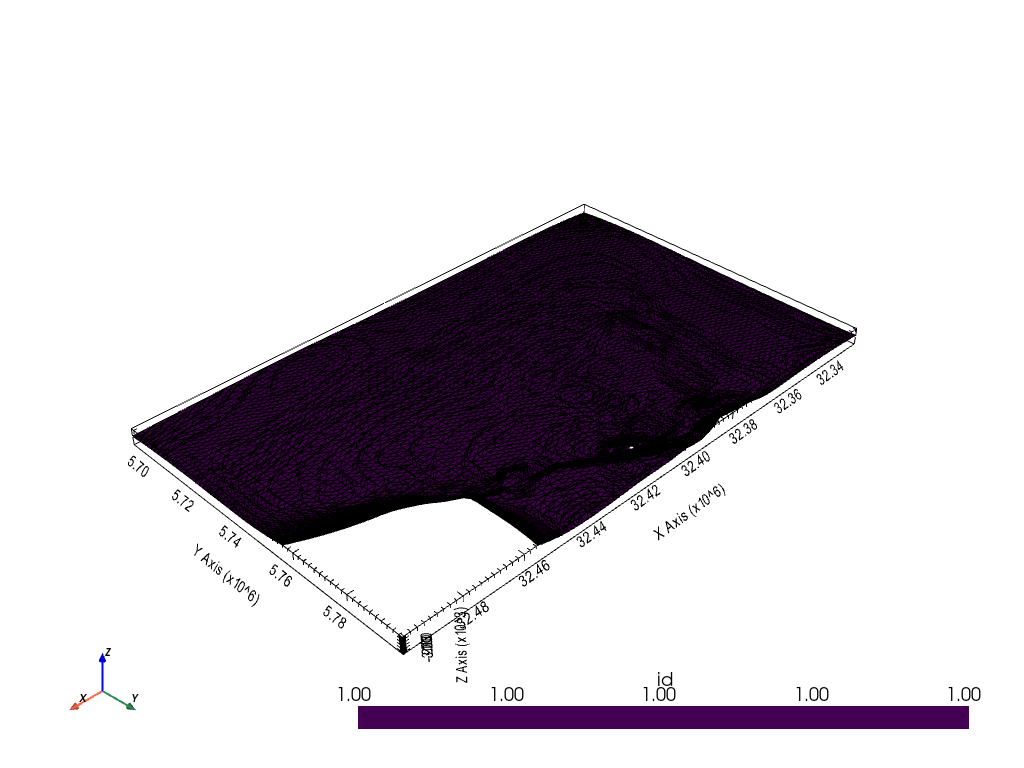

(<pyvista.plotting.plotting.Plotter at 0x7feb69148af0>, None)

In [34]:
pg.show(pgmeshu)

### pyGIMLi toSubsurface 

pyGIMLi now also has  `mt.toSubsurface` to transfer pyGIMLi meshes into subsurface objects. For now, it only outputs unstructured elements.

In [37]:
ssGmpy = mt.toSubsurface(pgmeshu)
pg.info(ssGmpy.mesh)
type(ssGmpy)

23/04/21 - 12:50:15 - pyGIMLi - INFO - <xarray.Dataset>
Dimensions:       (XYZ: 3, cell: 17079, cell_attr: 1, nodes: 3, points: 8742, vertex_attr: 0)
Coordinates:
  * points        (points) int64 0 1 2 3 4 5 6 ... 8736 8737 8738 8739 8740 8741
  * XYZ           (XYZ) <U1 'X' 'Y' 'Z'
  * cell_attr     (cell_attr) object 'id'
  * vertex_attr   (vertex_attr) int64 
    cell_         (cell) int64 0 1 2 3 4 5 ... 17074 17075 17076 17077 17078
Dimensions without coordinates: cell, nodes
Data variables:
    vertex        (points, XYZ) float64 3.232e+07 5.691e+06 ... 1.945e+03
    cells         (cell, nodes) int64 2 1 0 1 2 3 ... 8738 8624 8624 8738 8740
    cell_attrs    (cell, cell_attr) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    vertex_attrs  (points, vertex_attr) float64 


subsurface.structs.unstructured_elements.TriSurf

### Gravity Forward Operator Test 

We will use another Gempy model to simulate the gravity response in the pyGIMLi mesh and the Gempy model. 

The following cell may take some time 

Active grids: ['regular']
Fault colors changed. If you do not like this behavior, set change_color to False.
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                         values
range              2926.174978
$C_o$            203869.047619
drift equations         [3, 3]


/opt/anaconda3/envs/absub/lib/python3.8/site-packages/gempy-2.2.8-py3.8.egg/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


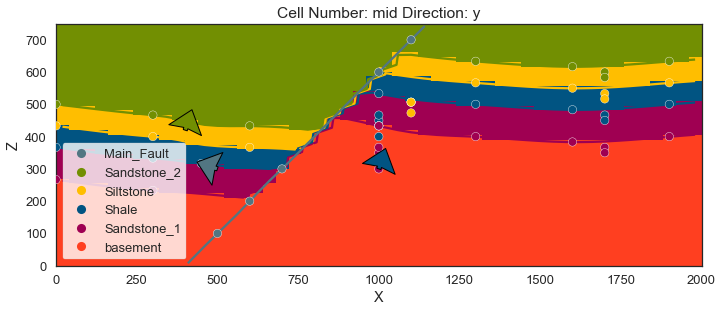

In [38]:
geo_model = gp.create_model('Tutorial_ch1_1_Basics')

data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0, 2000., 0, 2000., 0, 750.], [50, 50, 50],
             path_o=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_orientations.csv",
             path_i=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_points.csv",
             default_values=True)

gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Main_Fault',
                          "Strat_Series": ('Sandstone_2', 'Siltstone',
                                           'Shale', 'Sandstone_1', 'basement')},
                         remove_unused_series=True)
geo_model.set_is_fault(['Fault_Series'])


#Compiling THEANO functions
#geo_model.update_to_interpolator()
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_run',
                    )
 
model = gp.compute_model(geo_model, to_subsurface=True) #Compute Model
gp.plot_2d(geo_model)

Now we convert the Gempy model into pyGIMLi mesh and also export a vtk file that we can view to further analyze using a 3D plotting software

In [40]:
gempymesh = model.s_regular_grid
pgmesh_new = mt.fromSubsurface(gempymesh, order='F')
pgmesh_new.exportVTK('pgmesh_vtk')

In [41]:
type(pgmesh_new)

pgcore._pygimli_.Mesh

Now we are in the pyGIMLi world and we assign density values to the layers from Gempy Model 

[2. 3. 4. 5. 6.]


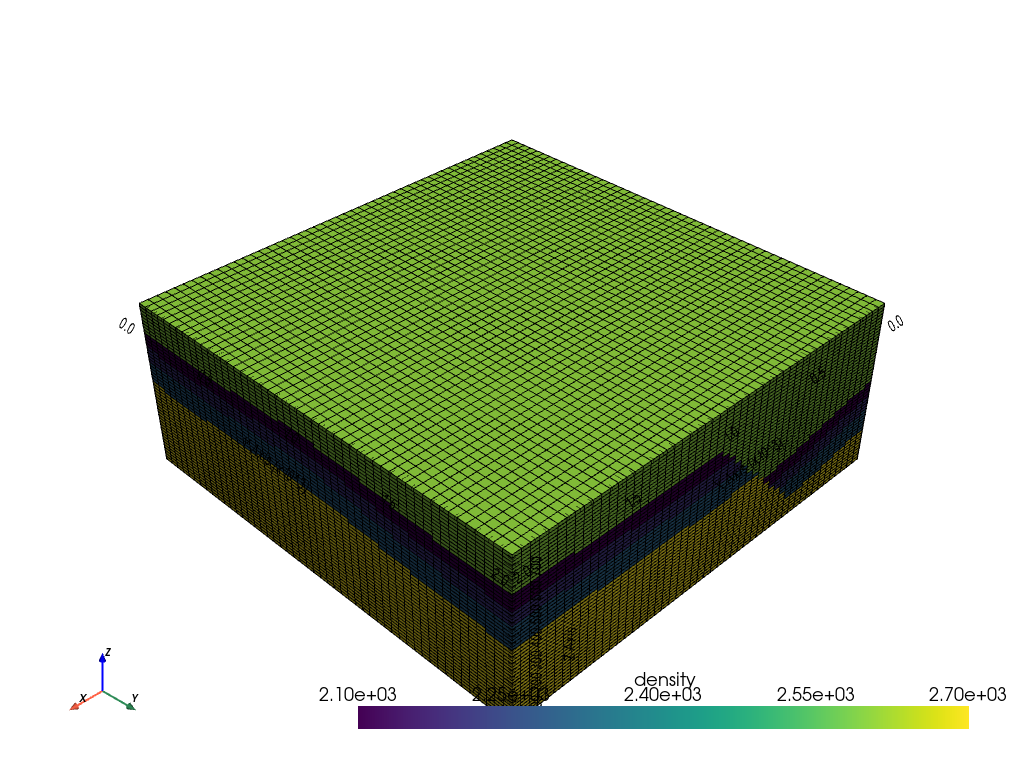

(<pyvista.plotting.plotting.Plotter at 0x7feb7ec47250>, None)

In [42]:
pvec = pgmesh_new['property_matrix']
pvec = np.around(pvec) #Round Float values from property matrix
dens = np.zeros(pvec.shape[0])
(unique, counts) = np.unique(pvec, return_counts=True)
layers = np.asarray(unique)
print(layers)

## Assign values to new dens vec 
dens[pvec==6] = 2700
dens[pvec==5] = 2300
dens[pvec==4] = 2200
dens[pvec==3] = 2100
dens[pvec==2] = 2600

density = pg.solver.cellValues(pgmesh_new, dens)
pg.show(pgmesh_new, density, label='density')

We need to extend the 3D grid to avoid edge effects when calculating the gravity potential. We do this by using the handy function : `pg.meshtools.appendBoundaryGrid` . We extend the boundaries to 0. 

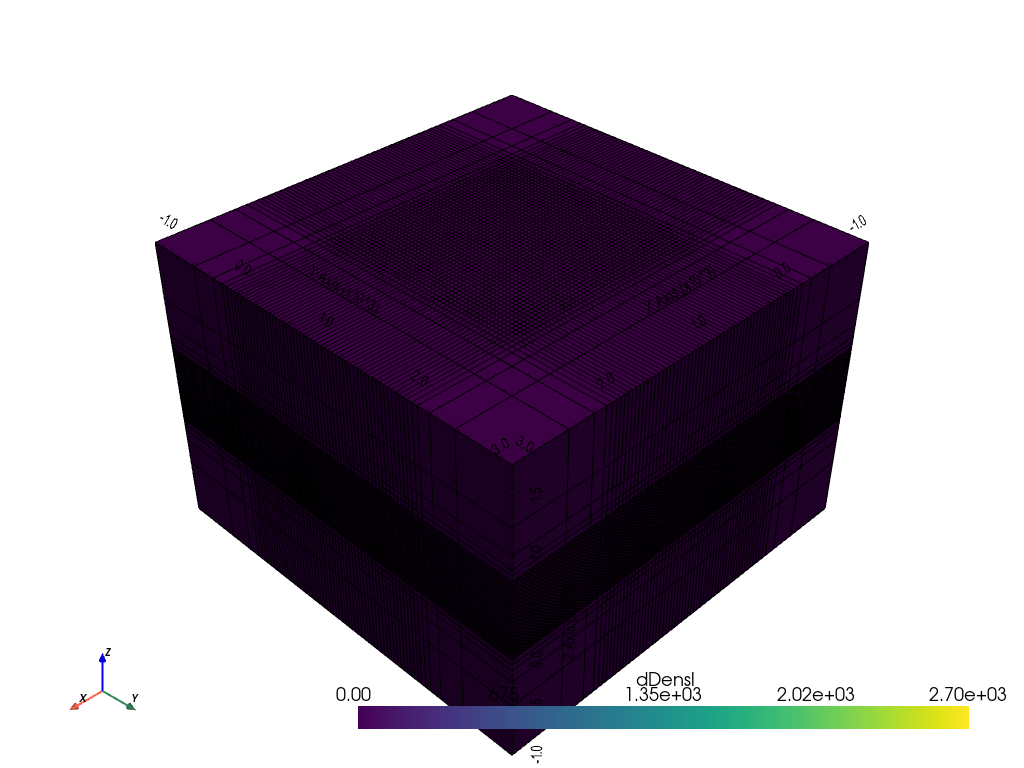

(<pyvista.plotting.plotting.Plotter at 0x7feb7ec3d370>, None)

In [44]:
l = np.geomspace(50, 1000, num=5)
ml = pg.meshtools.appendBoundaryGrid(pgmesh_new, xbound=l, ybound=l, zbound=l, 
                                     isSubSurface=False, verbose=True)
                                     
dDensL = pg.interpolate(pgmesh_new, density, ml.cellCenters(), fallback=0)

pg.show(ml, dDensL, label='dDensl') # change opacity here doesn't work :( 

No we calculate the gravity potential : The gravitational potential of a spatially distributed density anomaly can be obtained using a finite-element solution of the following equation:

$$ \nabla^{2} \phi=-4 \pi G \rho(x, y, z) $$

The gravitational anomaly is then given by:

$$ g(x, y, z)=-\nabla \phi $$ 

The following cell may take some time : 

Elapsed time is 1 minute and 44.14 seconds.


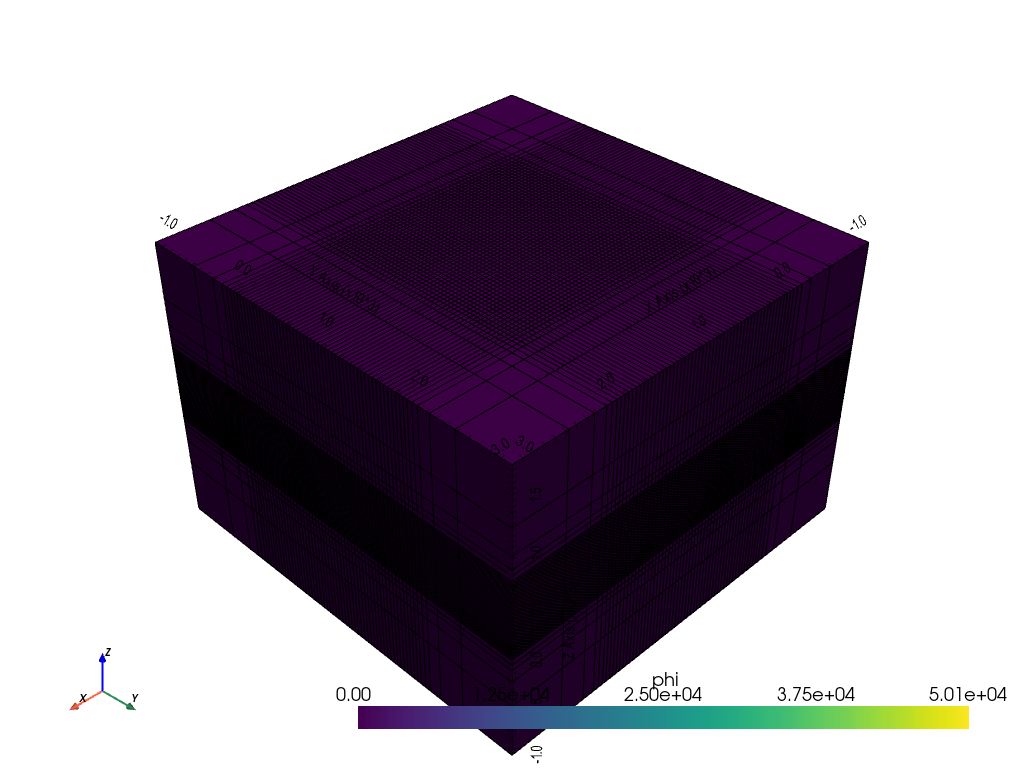

(<pyvista.plotting.plotting.Plotter at 0x7feb891c6040>, None)

In [45]:
pg.tic()
phi = 4. * np.pi * pg.physics.constants.GmGal * pg.solver.solve(ml, a=1, f=dDensL, bc={'Dirichlet':{'*': 0.0}})
grad = -pg.solver.grad(ml, phi)
pg.toc()
#pg.show(ml, phi, label='phi')

We place the sensors near the area of interest from the initial Gempy model and look at the G_z 

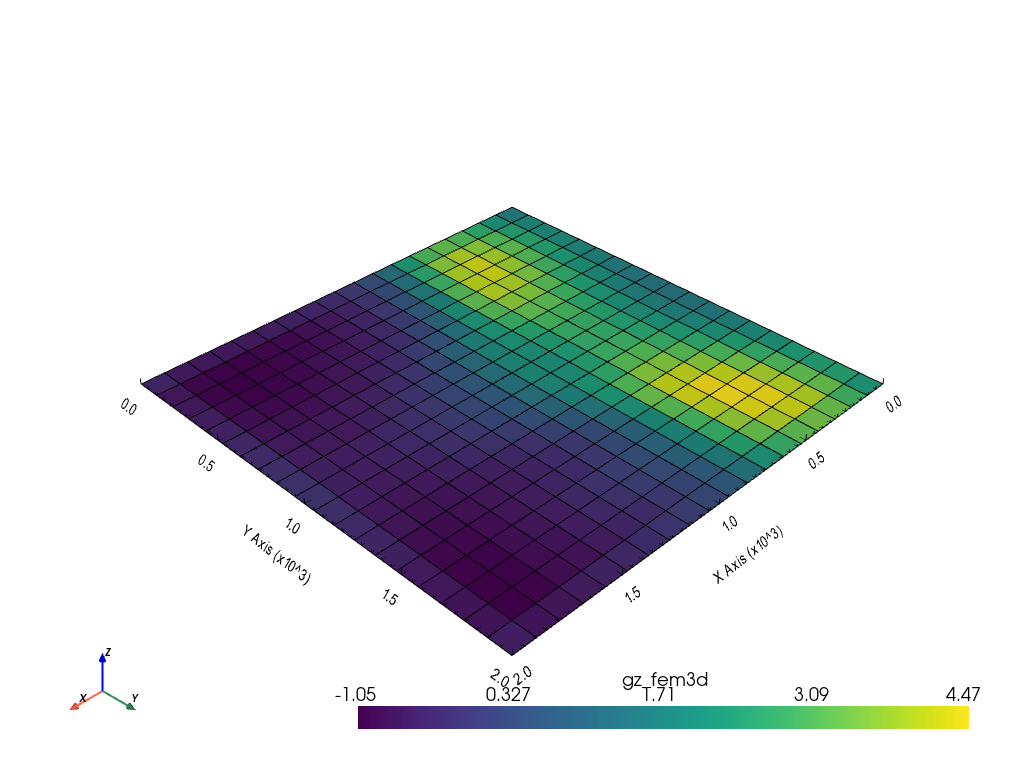

(<pyvista.plotting.plotting.Plotter at 0x7feb8ae8a700>, None)

In [88]:
height = 350
n = np.linspace(0, 2000, 20)
mesh2D = pg.createGrid(n,n)
mesh3D = pg.createGrid(n, n, np.zeros(len(n))+height)    
gz_fem3d = pg.interpolate(ml, grad[:,2], destPos=mesh3D.cellCenters())
pg.show(mesh3D,gz_fem3d, label='gz_fem3d')

Now we try to replicate this in Gempy using the gravity forward model. We start by assigning the density values we assignedi in the pyGIMLi mesh 

/opt/anaconda3/envs/absub/lib/python3.8/site-packages/gempy-2.2.8-py3.8.egg/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


,surface,series,order_surfaces,color,id,density
4,Main_Fault,Fault_Series,1,#527682,1,0.000000
3,Sandstone_2,Strat_Series,1,#728f02,2,2.600000
2,Siltstone,Strat_Series,2,#ffbe00,3,2.100000
0,Shale,Strat_Series,3,#015482,4,2.200000
1,Sandstone_1,Strat_Series,4,#9f0052,5,2.300000
5,basement,Strat_Series,5,#ff3f20,6,2.700000


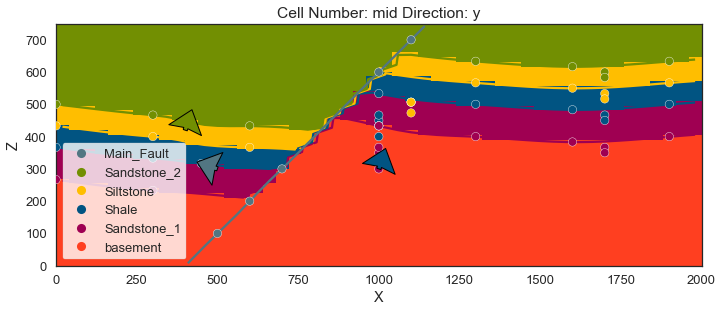

In [47]:
gp.plot_2d(geo_model)
geo_model.add_surface_values([0,2.6,2.1,2.2,2.3,2.7], ['density'])

First we need to define the location of the devices. For this example we can make a map:

In [69]:
grav_res = 20
X = np.linspace(0, 2000, grav_res)
Y = np.linspace(0, 2000, grav_res)
Z = 1000
xyz = np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T
xy_ravel

array([[   0.        ,    0.        , 1000.        ],
       [ 105.26315789,    0.        , 1000.        ],
       [ 210.52631579,    0.        , 1000.        ],
       ...,
       [1789.47368421, 2000.        , 1000.        ],
       [1894.73684211, 2000.        , 1000.        ],
       [2000.        , 2000.        , 1000.        ]])

We look at it from above 

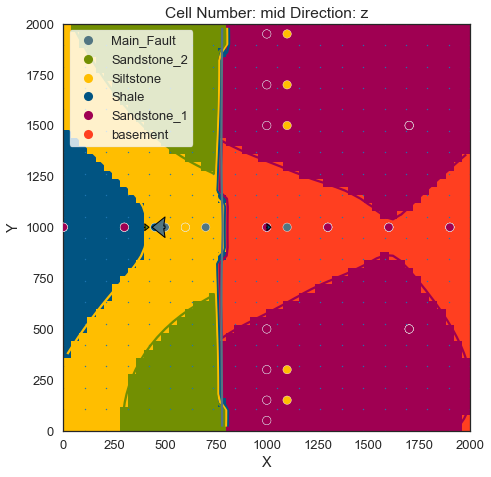

In [70]:
gp.plot_2d(geo_model, direction='z', show=False)
plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.show()

Now we need to create the grid centered on the devices and compute gz. If you increment the resolution it would have a longer compute time during the forward simulation

In [78]:
geo_model.set_centered_grid(xy_ravel, resolution=[10, 10, 15], radius=5000)
geo_model.grid.centered_grid.kernel_centers

from gempy.assets.geophysics import GravityPreprocessing
g = GravityPreprocessing(geo_model.grid.centered_grid)
gz = g.set_tz_kernel()
gz

Active grids: ['regular' 'centered']


array([-0.00140158, -0.00095076, -0.00032329, ..., -0.14442424,
       -0.16834485, -0.17551284])

Next we pass the geo_model and the density block which is 1. 

In [79]:
gp.set_interpolator(geo_model, output=['gravity'], pos_density=1, gradient=False,
                    theano_optimizer='fast_run')


Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                         values
range              2926.174978
$C_o$            203869.047619
drift equations         [3, 3]


In [80]:
sol = gp.compute_model(geo_model)
grav = sol.fw_gravity

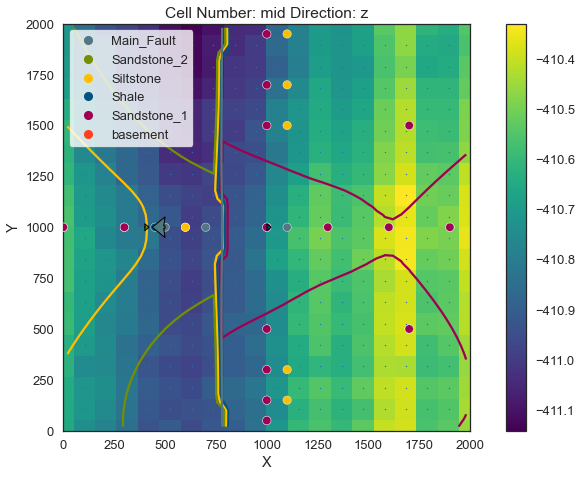

In [81]:
gp.plot_2d(geo_model, direction=['z'], height = 350, show_data=True,
           show=False)

plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.imshow(grav.reshape(grav_res, grav_res),
           extent=(xy_ravel[:, 0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0]) / 2,
                   xy_ravel[:, 1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2,
                   xy_ravel[:, 1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1]) / 2),
           cmap='viridis', origin='upper')
plt.colorbar()
plt.show()